¡Hola!

Me llamo Santiago y para mí es un gusto revisar tu proyecto el dia de hoy. Soy el reviewer que te estará acompañando y asesorando en el proceso de revisión el día de hoy.

Cuando vea un error iré realizando un proceso gradual de darte información, de solo informarte la primera vez a darte más datos acerca del mismo en las siguientes iteraciones que te puedan ayudar a tener una visión más amplia de la situación. Haré comentarios, desde observaciones hasta sugerencias prácticas que involucran temas generales y buenas prácticas en el área si así lo deseas. También puedes comentarme preguntas o discusiones que puedas tener con plena tranquilidad.

Respecto a los comentarios que yo realize: **No los elimines, muevas o modifiques por favor**.

Encontrarás mis comentarios con los colores verde, amarillo y rojo, así:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien. Todo se realizó correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho aunque hay algunas sugerencias que te pueden ser útiles
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Requiere acciones o correciones, esta parte requiere tomar correciones debido a que hay algo que puede no funcionar como lo esperamos.
</div>

Si deseas comentarme algo, puedes hacerlo sin problema usando el siguiente formato:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
Preguntas, discusiones o solo comentarios.
</div>

# Descarga los datos y prepáralos para el análisis

In [1]:
#importar librerias
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns


In [2]:
#leer los csv 
visits=pd.read_csv('/datasets/visits_log_us.csv')
orders=pd.read_csv('/datasets/orders_log_us.csv')
costs=pd.read_csv('/datasets/costs_us.csv')


In [3]:
#preparacion de datos del dataframe visits

#preparar los datos de cada columna
visits = pd.read_csv(
    '/datasets/visits_log_us.csv',
    dtype={'dvice': 'category'},
    parse_dates=['Start Ts', 'End Ts']
) 
#ponerle formato a las columnas
visits.columns = visits.columns.str.replace(' ', '_').str.lower()


In [4]:
#muestra de los dtype correctos
print(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None


In [5]:
#preparacion de datos del dataframe orders
#ver informacion del df
print(orders.info())
#preparar los datos de cada columna
orders = pd.read_csv(
    '/datasets/orders_log_us.csv',
    parse_dates=['Buy Ts'],
) 
#ponerle formato a las columnas
orders.columns = orders.columns.str.replace(' ', '_').str.lower()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


In [6]:
#muestra de los dtype correctos
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None


In [7]:
#preparacion de datos del dataframe visits
#ver informacion del df
print(costs.info())
#preparar los datos de cada columna
costs = pd.read_csv(
    '/datasets/costs_us.csv',
    parse_dates=['dt'],
) 
#ponerle formato a las columnas
costs.columns = costs.columns.str.replace(' ', '_').str.lower()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


In [8]:
#muestra de los dtype correctos
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, todo el proceso de carga de datos se hizo de una manera bastante acertada, pues no solo se hicieron las transformaciones de datos pertinentes sino que se realizaron todas desde la misma carga, que no solo es permitido sino eficiente y práctico además de entender muy bien las funciones de carga del dataframe. Como sugerencia diría que a un nivel más avanzado de análisis, pues el que hiciste está muy bien, está revisar los valores permitidos para los distintos datos, como observar si los valores de fechas son pertinentes, esto ayuda a tener una idea de datos atípicos de antemano, aunque no es una obligación realizarlo y solo otorga más información a la hora de realizar análisis posteriores.
</div>

# Haz informes y calcula métricas 

## Producto:

### ¿Cuántas personas lo usan cada día, semana y mes?

In [9]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date
#agrupar visitas por dia 

view_day= visits.groupby('session_date')['uid'].nunique()

#agrupar visitas por semana 

view_week= visits.groupby(['session_week','session_year'])['uid'].nunique().reset_index()

#agrupar visitas por mes

view_month= visits.groupby(['session_month','session_year'])['uid'].nunique().reset_index()
print(view_day.mean())
print(view_week.mean())
print(view_month.mean())

/tmp/ipykernel_44/3635215996.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  visits['session_week']  = visits['start_ts'].dt.week


907.9917582417582
session_week      26.415094
session_year    2017.415094
uid             5716.245283
dtype: float64
session_month        6.500000
session_year      2017.416667
uid              23228.416667
dtype: float64


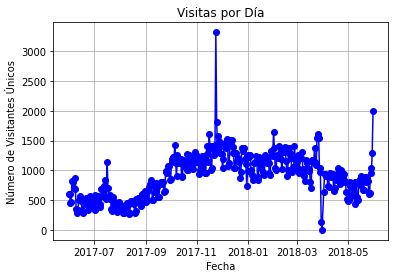

In [10]:
# gráfico de visitas por día

plt.plot(view_day.index, view_day.values, marker='o', linestyle='-', color='b')
plt.title('Visitas por Día')
plt.xlabel('Fecha')
plt.ylabel('Número de Visitantes Únicos')
plt.grid(True)
plt.show()

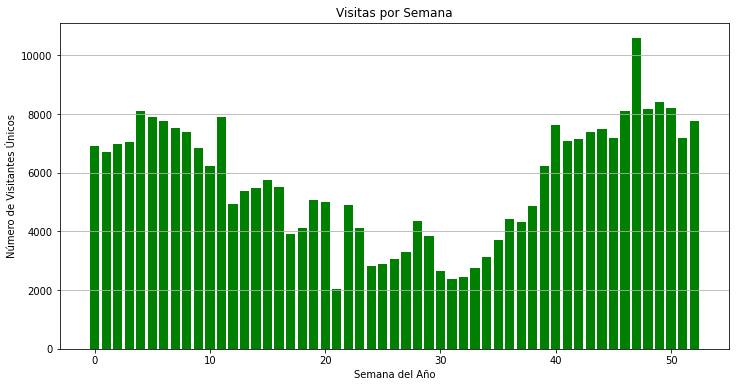

In [11]:
#gráfico de visitas por semana

plt.figure(figsize=(12, 6))
plt.bar(view_week['session_week'].index, view_week['uid'].values, color='green')
plt.title('Visitas por Semana')
plt.xlabel('Semana del Año')
plt.ylabel('Número de Visitantes Únicos')
plt.grid(axis='y')
plt.show()


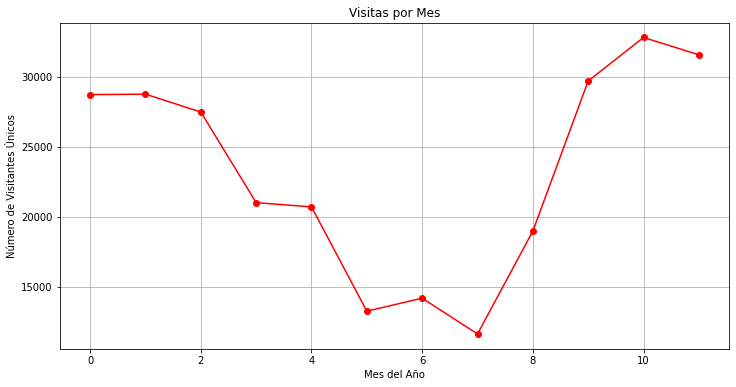

In [12]:
# Crear gráfico de visitas por mes
plt.figure(figsize=(12, 6))
plt.plot(view_month['session_month'].index, view_month['uid'].values, marker='o', linestyle='-', color='r')
plt.title('Visitas por Mes')
plt.xlabel('Mes del Año')
plt.ylabel('Número de Visitantes Únicos')
plt.grid(True)
plt.show()

en promedio por dia hay 907 usuarios , 5825 a la semana y 23228 al mes en la plataforma

segun los graficos el sitio experimenta caida de sesiones en el mes 4 hasta elmes 8 de todo el dataframe, se ve la ciada en el grafico mensual y semanal

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen cálculo para cada uno de los datos, aunque hay un detalle que apreciar: Cuando usas los atributos .week o .month estás tomando el número de semana/mes independiente del año, esto llevará a problemas pues se están agrupando semanas y meses de años distintos y no se hace la progresión adecuada, usar astype('datetime64[M]') / astype('datetime64[W]') te dará el resultado sin necesidad de mezclar los años, a pesar de esto la agrupación y la lógica está bien implementada, es solo un detalle difícil de captar pero que te será muy útil.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

No hay análisis gráfico, es necesario incluirlo sobre la progresión, con este sería posible ver la anomalía en un punto debido al usar .week o .month en lugar del astype que incluye los datos con el año.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien el análisis gráfico, se ven muy bien las gráficas, aunque persiste el usar .week y .month en lugar del astype, lo cual crea un análisis que puede presentar algunas situaciones extrañas como unir semanas y meses de años distintos. Esto se puede hacer cuandoa aseguramos que existe una sesionalidad más fuerte que la tendencia, esto último es un tema mucho más profundo y avanzado de series de tiempo que no se espera desarrollar, así que la recomendación se mantiene en usar astype en lugar de .week y .month.
</div>

### ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).

In [13]:
daily_stats = visits.groupby('session_date').agg({'uid': ['count', 'nunique']})


mean_view_day = daily_stats['uid']['count'] / daily_stats['uid']['nunique']
print(mean_view_day.mean())

1.082169644003972


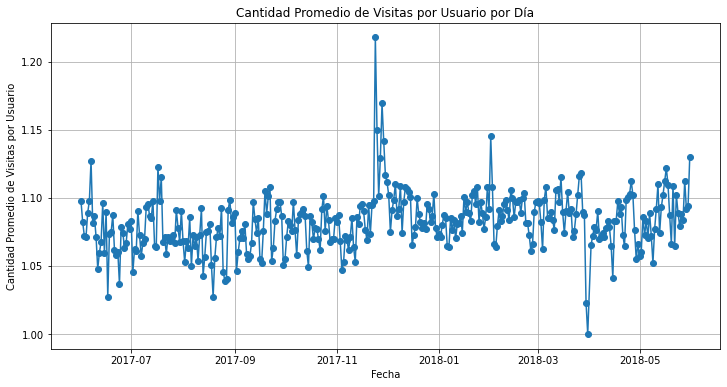

In [14]:
plt.figure(figsize=(12, 6))

plt.plot(mean_view_day.index, mean_view_day.values, marker='o', linestyle='-',)
plt.title('Cantidad Promedio de Visitas por Usuario por Día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Promedio de Visitas por Usuario')
plt.grid(True)
plt.show()

hay 1 sesion en promedio por dia por usuario

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hay un pequeño error en el cálculo, la cantidad de visitas por día debe ser count pues un usuario puede tener más de una visita por día y los usuarios deben ser nunique pues no es relevante que existan usuarios repetidos, es decir está invertido los métodos. Además es necesario el análisis gráfico a lo largo del tiempo, no solamente la media, un line plot normal serviría.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Estás casí allí pero hay un error, un error que es posible analizar desde la gráfica, lo cuál es una de las tareas más habituales de los analistas y científicos de datos. En este caso es muy raro que siempre el resultado sea 1, esto se debe a que el view_day que usaste para el punto anterior (que está bien pues te interesaban usuarios no únicos) no es el mismo de aquí, las vistas totales se deben tomar contando usuarios repetidos, es decir, count para el numerador (falta) y nunique para el denominador (tal como lo tienes).
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, haz aplicado las correciones pertienentes!.
</div>

### ¿Cuál es la duración de cada sesión?

No handles with labels found to put in legend.


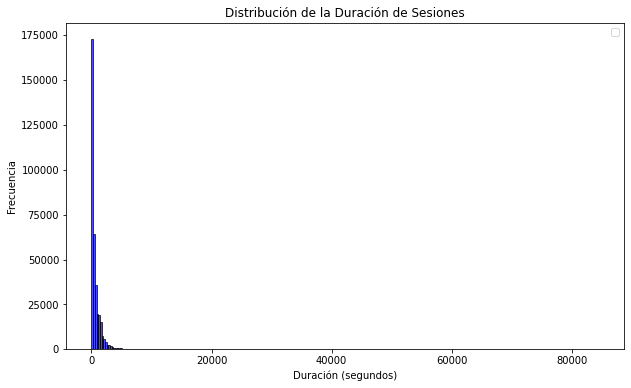

In [15]:
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds


plt.figure(figsize=(10, 6))
plt.hist(visits['duration'], bins=300, color='blue', edgecolor='black', alpha=0.7)


plt.title('Distribución de la Duración de Sesiones')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()

en promedio la duracion por sesion es 10 minutos con 43 segundos

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

No hay análisis gráfico, es importante elegir el gráfico más pertinente para esta pregunta. Adicionalmente decir 00:10:43 horas es algo confuso pues hace pensar que la duración de una sesión son 10 horas en promedio lo cuál además de ser raro no es lo que quiere decir el formato, si no 10 minutos con 43 segundos, puedes expresarlo así o usar una medida absoluta como segundos o minutos (usando .dt.seconds por ejemplo). Adicionalmente se aprecia una estadística más descriptiva como decir la media, la mediana, la moda y desviación estandar pues esta distribución, cuando elijas la gráfica pertinente no puede ser descrita tan solo con la media.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, ahora todo es más claro y hay un análisis gráfico, aunque te sugiero aumentar la cantidad de bins a por lo menos 300 o más debido a que existe un espacio temporal muy amplio, o acortar el espacio temporar a visualizar, igualmente te sugiero añadir la mediana y la moda.
</div>

### ¿Con qué frecuencia los usuarios y las usuarias regresan?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   device                359400 non-null  object        
 1   end_ts                359400 non-null  datetime64[ns]
 2   source_id             359400 non-null  int64         
 3   start_ts              359400 non-null  datetime64[ns]
 4   uid                   359400 non-null  uint64        
 5   session_year          359400 non-null  int64         
 6   session_month         359400 non-null  int64         
 7   session_week          359400 non-null  int64         
 8   session_date          359400 non-null  object        
 9   duration              359400 non-null  int64         
 10  first_session_date    359400 non-null  datetime64[ns]
 11  first_activity_month  359400 non-null  datetime64[ns]
dtypes: datetime64[ns](4), int64(5), object(2), uint64(1)
memor

<AxesSubplot:title={'center':'Cohortes: retención de usuarios/as'}, xlabel='cohort_lifetime', ylabel='first_activity_month'>

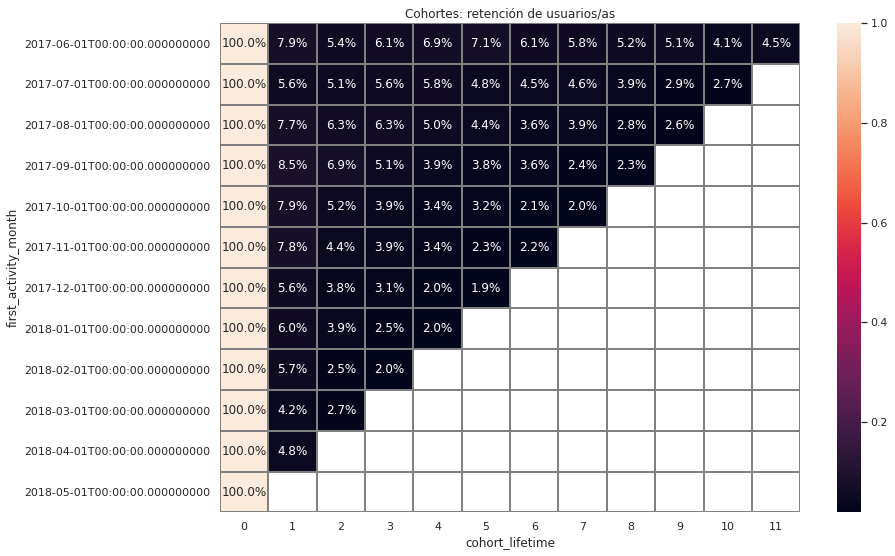

In [16]:
#determinar el primer inicio de sesion para iniciar el cohorte
first_session_date = visits.groupby('uid')['start_ts'].min().reset_index()
first_session_date.columns = ['uid','first_session_date']
#capturar el primer mes de la sesion
first_session_date['first_activity_month']=first_session_date['first_session_date'].astype('datetime64[M]')
visits = visits.merge(first_session_date,on='uid') 
print(visits.info())
#capturar el mes de las sesiones
visits['activity_month']=visits['session_date'].astype('datetime64[M]')

#visits['first_activity_month']=visits['first_session_date'].astype('datetime64[M]')
visits['cohort_lifetime']=(visits['activity_month']-visits['first_activity_month'])
visits['cohort_lifetime']=visits['cohort_lifetime']/ np.timedelta64(1, 'M')
visits['cohort_lifetime']=visits['cohort_lifetime'].round().astype(int)
cohorts1=visits.pivot_table(columns='cohort_lifetime',
                  index='first_activity_month',
                  values='uid',
                  aggfunc='nunique')

cohorts = (
      visits.groupby(['first_activity_month', 'cohort_lifetime'])
     .agg({'uid': 'nunique'})
     .reset_index()
 ) 
initial_users_count=cohorts[cohorts['cohort_lifetime']==0][['first_activity_month','uid']]
initial_users_count=initial_users_count.rename(columns={'uid':'cohort_users'})
cohorts=cohorts.merge(initial_users_count,on='first_activity_month')
cohorts['retention']=cohorts['uid'] / cohorts['cohort_users']

retention_pivot = cohorts.pivot_table(
     index='first_activity_month',
     columns='cohort_lifetime',
     values='retention',
     aggfunc='sum',
 )
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohortes: retención de usuarios/as')
sns.heatmap(
     retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray'
 ) 


por medio del grafico se observa claramente que hay una gran caida de usuarios en el segundo mes de cada cohorte y que despues en cada cohorte tiende a descender hasta el ultimo mes de su vida correspondiente

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Este es un análisis excelente, creaste la matriz de retención de forma precisa, elegiste la herramienta de visualización adecuada y además usaste porcentajes para representar el porcentaje de retención. Solo como sugerencia en la representación como mapa de calor de la matriz de retención, no hay necesidad de poner las fechas con el timestamp completo pues solo estás analizando mes a mes, hasta el día on incluso solo hasta el mes (pero si quieres evitar transformar el datetime no hay problema hasta el día) está perfectamente bien. Igualmente excelente respuesta.
</div>

## Ventas

### ¿Cuándo la gente empieza a comprar? 

In [17]:
#unir visits y orders por uid
cr=visits.merge(orders,on='uid')
#encontrar la primera compra de cada usuario
first_buy= cr.groupby('uid')['buy_ts'].min().reset_index() 
first_buy.columns = ['uid','first_buy']
cr_ultimate = cr.merge(first_buy,on='uid') 

#a partir de first_session_date determinar la diferencia con first_buy
conversion=cr_ultimate['first_buy']-cr_ultimate['first_session_date']
#determinar el promedio que tarda la gente en comprar algun articulo
conversion_mean=conversion.mean()
#imprimir el resultado donde indica cuando la gente empieza a comprar
print(conversion)


0        0 days 00:20:00
1        0 days 00:20:00
2        0 days 15:11:00
3        0 days 15:11:00
4        0 days 15:11:00
               ...      
761802   0 days 00:04:00
761803   0 days 00:10:00
761804   0 days 00:06:00
761805   0 days 00:05:00
761806   0 days 00:14:00
Length: 761807, dtype: timedelta64[ns]


segun el resultado promedio la gente empieza a comprar a partir de los 17 dias 15 horas 37 minutos y 2 segundos

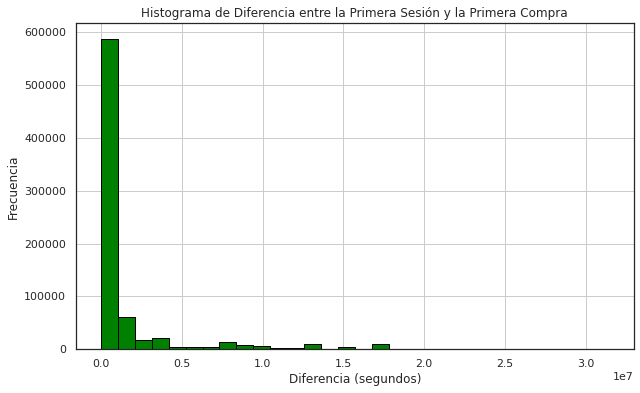

In [18]:
conversion_seconds = [delta.total_seconds() for delta in conversion]

plt.figure(figsize=(10, 6))
plt.hist(conversion_seconds, bins=30, color='green', edgecolor='black')
plt.title('Histograma de Diferencia entre la Primera Sesión y la Primera Compra')
plt.xlabel('Diferencia (segundos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

En este caso es necesario realizar el análisis gráfico pertinenete, además que si este se va a obviar, es importante entonces explicar la razón y por qué la media es más explicativa que el gráfico elegido para representar en qué momento empiezan las personas a comprar, además el cálculo es necesario hacerle una correción: Es necesario comparar la primera sesión con la primera compra de cada usuario y no con todos los buy_ts pues así se puede determinar como a nivel de usuario, cuanto tarda uno al hacer la primera compra. Recuerda interpretar los resultados de acuerdo al problema, una espera de 130 días después del primer inicio de sesión es un poco elevado, que si bien puede existir, tras analizar los índices de retención es un contrasentido.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Está bien ejecutado el algoritmo en este caso, aunque la gráfica no es la apropiada, en este caso un histograma sería mucho mejor, pues nos interesa saber cuantas compras se dan (frecuencia) en función de los días que pasan, y sería una mejor muestra que la media, debido a que existen valores tan extremos es una medida algo engañosa en este caso.
</div>

### ¿Cuántos pedidos hacen durante un período de tiempo dado?


In [19]:
#recuperar el mes de la  compra de cada cliente
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
#recuperar el mes de los costos
#costs['month'] = costs['dt'].astype('datetime64[M]') 
#Ahora recuperemos el mes de la primera compra de cada cliente:
first_orders1 = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders1.columns = ['uid', 'first_order_month']

#Calcularemos el número de clientes (n_buyers) para cada mes:
cohort_sizes1 = first_orders1.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes1.columns = ['first_order_month', 'n_buyers']
#Creemos cohortes. Vamos a agregar los meses de la primera compra de los clientes y clientas a la tabla de pedidos:
orders_1 = pd.merge(orders,first_orders1, on='uid')
#Ahora vamos a agrupar la tabla de pedidos por mes de la primera compra y mes de la compra y encontrar el numero de clientes unicos
cohorts1 = orders_1.groupby(['first_order_month','order_month']).agg({'uid': 'nunique'}).reset_index()
#Agreguemos datos sobre cuántos usuarios realizaron sus primeras compras en cada mes a la tabla cohorts
report1 = pd.merge(cohort_sizes1, cohorts1, on='first_order_month')
report1.head() 

# Agrupar por 'order_month' y contar el número de compras
n_compras_por_mes = orders.groupby('order_month')['uid'].count().reset_index()

# Renombrar la columna 'uid' a 'n_compras'
n_compras_por_mes.columns = ['order_month', 'n_compras']

# Ahora, puedes fusionar 'report1' y 'n_compras_por_mes' por 'order_month'
report1 = report1.merge(n_compras_por_mes, on='order_month', how='left')
#así que hagamos que las columnas muestren la edad de la cohorte en lugar del mes del pedido
report1['age'] = (
    report1['order_month'] - report1['first_order_month']
) / np.timedelta64(1, 'M')
report1['age'] = report1['age'].round().astype('int')
#calcular cuantas compras se hace por cada comprador
report1['promedio']=report1['n_compras']/report1['n_buyers']
output = report1.pivot_table(
    index='first_order_month', columns='age', values='promedio', aggfunc='mean'
).round(2)

output.fillna('') 


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.16,1.17,0.89,1.67,2.81,2.8,3.07,2.33,2.61,2.63,1.62,2.15
2017-07-01,1.23,0.94,1.76,2.95,2.94,3.23,2.46,2.75,2.77,1.7,2.26,
2017-08-01,1.32,2.47,4.15,4.13,4.54,3.45,3.85,3.89,2.39,3.17,,
2017-09-01,1.31,2.2,2.19,2.41,1.83,2.05,2.06,1.27,1.68,,,
2017-10-01,1.31,1.3,1.43,1.09,1.22,1.23,0.75,1.0,,,,
2017-11-01,1.39,1.52,1.16,1.29,1.31,0.8,1.06,,,,,
2017-12-01,1.42,1.08,1.2,1.22,0.75,0.99,,,,,,
2018-01-01,1.40,1.57,1.58,0.97,1.29,,,,,,,
2018-02-01,1.45,1.46,0.9,1.19,,,,,,,,


hay una tendencia que los primeros cohortes tienden a tener mas compras promedio que las ultimas


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Para este punto es necesario no usar una cifra en particular si no analizar cada periodo de tiempo, se sugiere realizar una matriz similar a la de retención en donde se encuentren los usuarios por cohorte y cuantas compras se hacen por cada comprador de ese mes en promedio (con la cantidad de ordenes totales ese mes) de esta manera se puede visualizar por cohore, de aquellos que son compradores, cuantos pedidos hacen por mes en promedio, con la matriz quedaría muy bien representado graficamente.
</div>


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien la creación de la matriz, esto era lo esperado, haz hecho la parte más complicada ya, aunque es necesario detallar que el promedio se encuentra al revés, en este caso calculaste la cantidad de usuarios por compra, no de compras por usuario y el promedio se debe realizar solo por los compradores, no todo el uid, pues una vez corrijas el promedio si lo sigues haciendo con todo el espectro serán valores muy altos, pero se debe comparar compradores con compradores, es decir corrige el promedio para que sea número de comrpas (n_compras) por número de compradores (n_buyers). Una vez apliques estas correciones, estará listo!.
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, seguiste las recomendaciones como se esperaba!
</div>

### ¿Cuál es el tamaño promedio de compra?


In [20]:
#recuperar el mes de la  compra de cada cliente
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

#Ahora recuperemos el mes de la primera compra de cada cliente:
first_orders2 = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders2.columns = ['uid', 'first_order_month']

#Calcularemos el número de clientes (n_buyers) para cada mes:
cohort_sizes2 = first_orders2.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes2.columns = ['first_order_month', 'n_buyers']
#Creemos cohortes. Vamos a agregar los meses de la primera compra de los clientes y clientas a la tabla de pedidos:
orders_2 = pd.merge(orders,first_orders2, on='uid')
#Ahora vamos a agrupar la tabla de pedidos por mes de la primera compra y mes de la compra y encontrar el numero de clientes unicos
cohorts2 = orders_2.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
#Agreguemos datos sobre cuántos usuarios realizaron sus primeras compras en cada mes a la tabla cohorts
report2 = pd.merge(cohort_sizes2, cohorts2, on='first_order_month')
report2.head() 

# Agrupar por 'order_month' y contar el número de compras
n_compras_por_mes2 = orders.groupby('order_month')['uid'].nunique().reset_index()

# Renombrar la columna 'uid' a 'n_compras'
n_compras_por_mes2.columns = ['order_month', 'n_compras']

# Ahora, puedes fusionar 'report1' y 'n_compras_por_mes' por 'order_month'
report2 = report2.merge(n_compras_por_mes2, on='order_month', how='left')
#así que hagamos que las columnas muestren la edad de la cohorte en lugar del mes del pedido
report2['age'] = (
    report2['order_month'] - report2['first_order_month']
) / np.timedelta64(1, 'M')
report2['age'] = report2['age'].round().astype('int')
#hallar tamaño promedio por compra
report2['size_per_purchase'] = report2['revenue'] / report2['n_compras']

output = report2.pivot_table(
    index='first_order_month', columns='age', values='size_per_purchase', aggfunc='mean'
).round(2)

output.fillna('') 


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.6,0.7,0.44,0.33,0.39,0.3,0.26,0.29,0.42,0.15
2017-07-01,5.83,0.44,0.44,0.15,0.07,0.06,0.06,0.06,0.07,0.1,0.08,
2017-08-01,4.91,0.24,0.13,0.12,0.14,0.1,0.07,0.13,0.15,0.07,,
2017-09-01,5.30,0.62,0.3,2.08,0.27,0.39,0.43,0.23,0.13,,,
2017-10-01,4.65,0.51,0.17,0.17,0.15,0.12,0.13,0.14,,,,
2017-11-01,4.63,0.33,0.21,0.31,0.14,0.08,0.13,,,,,
2017-12-01,4.20,0.29,0.95,1.12,0.5,0.42,,,,,,
2018-01-01,3.58,0.23,0.25,0.18,0.06,,,,,,,
2018-02-01,3.56,0.24,0.1,0.08,,,,,,,,


mediante la tabla se ve que el tamaño de la primera compra en el primer mes es significativamente superior al de los demas meses

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

En este caso es necesario volver al análisis de cohortes para entender el tamaño promedio de cada compra y posteriormente estimar la media, en este caso es seguir con la lógica de cohortes para analizar el comportamiento de las compras a lo largo del tiempo. Además esto puede ser mostrado graficamente. 
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Aquí creo que hay que reevaluar la interpretación del problema, cuando se habla del promedio de compra es cuánto es el tamaño por cada compra, para esto es práctico la columna revenue, en este caso estimaste como evoluciona cada cohorte en total a lo largo de su edad y por eso se ve esta forma descendente, porque las cohorte más antiguas tienen más historial de compra. En este caso hay que estimar cual es el tamaño por cada compra usando revenue. Si quieres usar otra aproximación es: La media del revenue y crear una gráfica a partir de una tabla de pivoteo que muestre la evolución de la media del revenue a través de los meses (order_month) o presiguir con el análisis de cohortes pero estimando el tamaño y no la suma de las cohortes progresivamente.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, seguiste las recomendaciones como se esperaba!
</div>

### ¿Cuánto dinero traen? (LTV)


In [21]:
# Recuperar el mes de la compra de cada cliente
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

# Recuperar el mes de los costos
costs['month'] = costs['dt'].astype('datetime64[M]')

# Recuperar el mes de la primera compra de cada cliente
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

# Calcular el número de nuevos clientes (n_buyers) para cada mes
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

# Crear cohortes
orders_ = pd.merge(orders, first_orders, on='uid')
cohorts = orders_.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()

# Añadir datos sobre cuántos usuarios realizaron sus primeras compras en cada mes a la tabla cohorts
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

# Calcular el beneficio bruto multiplicando los ingresos por la rentabilidad
margin_rate = 1
report['gp'] = report['revenue'] * margin_rate

# Ajustar las columnas para mostrar la edad de la cohorte en lugar del mes del pedido
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

# Dividir el beneficio bruto de la cohorte de cada mes por el número total de usuarios de cada cohorte
report['ltv'] = report['gp'] / report['n_buyers']

# Pivotar la tabla para mostrar el LTV para cada cohorte y cada mes
output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='sum'
).round(2)

output.cumsum(axis=1).round(2).fillna('') 


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.4,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.37,7.58,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,,,,,
2017-12-01,4.74,5.0,5.93,7.0,7.31,7.65,,,,,,
2018-01-01,4.14,4.43,4.73,4.87,4.93,,,,,,,
2018-02-01,4.16,4.44,4.52,4.59,,,,,,,,


en esta tabla se puede destacar el dinero que traen el cuarto cohorte teniendo menos vida supera al primer cohorte en dinero

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

En general a través de la matriz de LTV tienes una buena iniciativa, aunque hay errores, los valores están fuertemente por debajo de lo esperado y esto es posiblemente a que estás usando el revenue del total de visitantes y no solamente de los compradores, por lo tanto aquellos que visitan pero no comprar son contados en este índice lo cuál no es preciso, es necesario revisar la lógica de negocio respecto a esto pues el age 0 está bien determinado pero la progresión no. Recuerda así revisar que tanto los compradores deben ser compradores solamente y el beneficio 'revenue' igualmente solamente debe ser de los compradores.
</div>
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
creo que no podria estar contando el total porque al principio solo se toma en orders['order_month'] a clientes que solo tienen una fecha en buy_ts si no la tendrian no tendrian order_month ademas creo que no .
</div> 

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Tienes toda la razón!, el error se encuentra en un detalle mucho más insignificante, pero que como analistas de datos a veces nos suele pasar, en la tabla de pivoteo final, usaste mean en lugar de sum y no usaste una suma acumulativa (cumsum), tras finalizar el pivot_table, la suma acumulativa es necesariua pues el beneficio se acumula con el tiempo, no se cada mes, como función de agregación, por lo tanto no calculaste el lvt total por cohorte, si no la media del lvt de cohorte y edad. Recuerda realizar el cumsum a través de las filas (axis=1) y no las columnas (axis=0) pues es necesario ver como se acumula el lvt en su evolución, no acumularlo entre cohortes, en general muy bien, solo es este detalle final que es un poco más exigente.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, seguiste las recomendaciones como se esperaba!
</div>

## Marketing

### ¿Cuánto dinero se gastó? Total/por fuente/a lo largo del tiempo

In [22]:
# Recuperar el mes de los costos
costs['month'] = costs['dt'].astype('datetime64[M]')

# Agrupar los costos por mes y fuente de anuncios
monthly_costs = costs.groupby('month').agg({'costs': 'sum'}).reset_index()

report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']

output = report_.pivot_table(
    index='first_order_month', columns='age', values='cac', aggfunc='sum'
).round(2)

output.cumsum(axis=1).round(2).fillna('') 


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,8.91,17.82,26.73,35.64,44.55,53.46,62.37,71.28,80.19,89.1,98.01,106.92
2017-07-01,9.49,18.98,28.47,37.96,47.45,56.94,66.43,75.92,85.41,94.9,104.39,
2017-08-01,10.80,21.6,32.4,43.2,54.0,64.8,75.6,86.4,97.2,108.0,,
2017-09-01,9.44,18.88,28.32,37.76,47.2,56.64,66.08,75.52,84.96,,,
2017-10-01,8.37,16.74,25.11,33.48,41.85,50.22,58.59,66.96,,,,
2017-11-01,9.29,18.58,27.87,37.16,46.45,55.74,65.03,,,,,
2017-12-01,8.74,17.48,26.22,34.96,43.7,52.44,,,,,,
2018-01-01,9.94,19.88,29.82,39.76,49.7,,,,,,,
2018-02-01,8.96,17.92,26.88,35.84,,,,,,,,


en total se gasto 329131 a lo largo del tiempo

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien los costos totales, aunque es necesario un análisis gráfico de depronto a través de los meses, los costos totales a través de los meses con una pivot table.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien llegaste a la respuesta correcta y con la tabla de pivoteo final.
</div>

### ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?

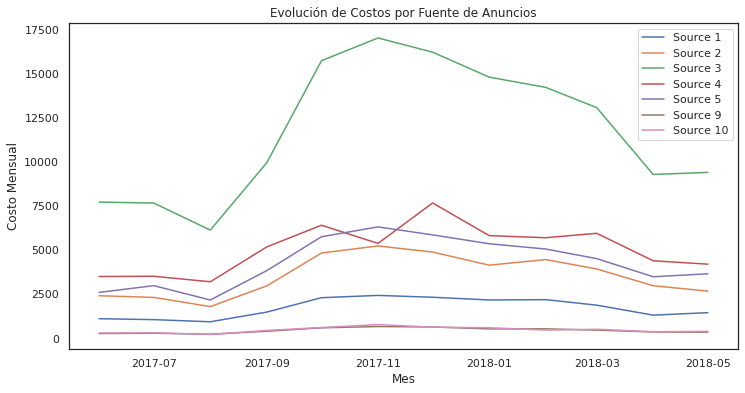

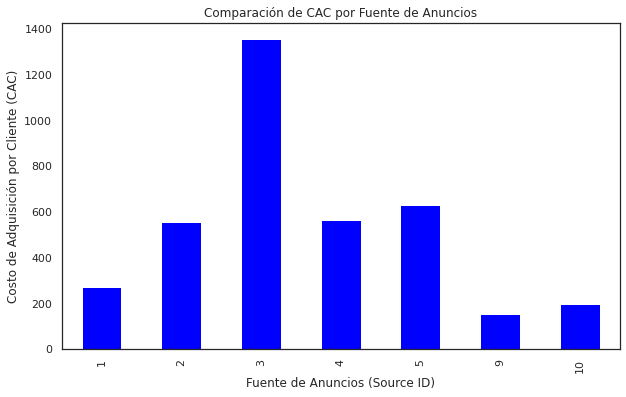

In [54]:
# Calcular los costos mensuales por fuente
monthly_source_cost = costs.groupby(['source_id', 'month']).sum().reset_index()

# Graficar la evolución de los costos a lo largo del tiempo para cada fuente
plt.figure(figsize=(12, 6))
for source_id, group in monthly_source_cost.groupby('source_id'):
    plt.plot(group['month'], group['costs'], label=f'Source {source_id}')

plt.xlabel('Mes')
plt.ylabel('Costo Mensual')
plt.title('Evolución de Costos por Fuente de Anuncios')
plt.legend()
plt.show()

# unir visits y orders
visits_orders1= pd.merge(visits, orders, on='uid', how='left')
visits_orders1['buy_ts']=visits_orders1['buy_ts'].dt.date
costs['dt']=pd.to_datetime(costs['dt']).dt.date
# Identificar los compradores para cada día
buyers_per_day = visits_orders1.groupby(['buy_ts', 'source_id'])['uid'].nunique().reset_index()
buyers_per_day.columns = ['dt', 'source_id','uid']

# Hacer merge entre los compradores y los costos
merged_data = pd.merge(buyers_per_day, costs, on=('dt','source_id'))

# Calcular el CAC por fuente
cac_by_source = merged_data.groupby('source_id')['costs'].sum() / merged_data.groupby('source_id')['uid'].nunique()

plt.figure(figsize=(10, 6))
cac_by_source.plot(kind='bar', color='blue')
plt.xlabel('Fuente de Anuncios (Source ID)')
plt.ylabel('Costo de Adquisición por Cliente (CAC)')
plt.title('Comparación de CAC por Fuente de Anuncios')
plt.show()

las fuentes de anuncio mas caras fueron la 3 y despues la 4 y 5 con una diferencia significativa y adicionalmente se obtuvo que la fuete mas costos es la 2

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Está bien calculado la parte inicial y además hay análisis gráfico, aunque sugiero usar un gráfico que adicionalmente de evidenciar los costos totales por fuente, también muestre la evolución de esos costos a través del tiempo para cada fuente, posteriormente es importante hacer el análisis de costo de adquisición de clientes para cada fuente y no solo los costos totales de cada fuente.
</div>



<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hiciste muy bien la gráfica comparativa, es necesario detallar mejor y corregir el costo de adquisición por cliente, es decir, examinar como por cada fuente, para cada día (es decir no usar report porque esto está diseñado por cohorte y no por cliente), identificar los compradores, de allí la primera compra del día, después hacer el merge entre el source id y la primera compra del día con costos y así finalmente calcular el costo de adquisición para cada día por fuente y hacer un plot donde se compare este cac. Es muy similar a lo que hiciste, solo que no usar el report que usaste para el mes porque no estarías calculando el costo de adquisición por cliente, si no su contribución a el costo de cada cohorte.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Se esperaba el costo mes a mes a forma de tabla de pivoteo, pero traer el CAC total es igual una forma de verlo, no es tan informativo y puede traer problemas pero igualmente se logra parcialmente el objetivo del problema.
</div>

### ¿Cuán rentables eran las inversiones? (ROI)


In [84]:
#hACER DF para calcular el ltv
visits1=visits[['uid','device','source_id']]

visits_orders1=pd.merge(visits1,orders,on=('uid'))
visits_orders1['dt']=visits_orders1['buy_ts'].dt.date
ultimate=pd.merge(visits_orders1,costs,on=('dt','source_id'))
ultimate=ultimate[['uid','device','source_id','revenue','dt','costs','order_month','month']]



                         uid   device  source_id  revenue          dt  costs  \
6700     8056418121947262981  desktop          1     3.67  2017-06-25  22.03   
6701     8056418121947262981  desktop          1     3.67  2017-06-25  22.03   
6702     8056418121947262981  desktop          1     3.67  2017-06-25  22.03   
6703     8056418121947262981  desktop          1     3.67  2017-06-25  22.03   
6704     8056418121947262981  desktop          1     3.67  2017-06-25  22.03   
...                      ...      ...        ...      ...         ...    ...   
761312  10502179066785155573  desktop          1     2.44  2017-08-19  23.20   
761313  10502179066785155573  desktop          1     2.44  2017-08-19  23.20   
761314   3854241582087196702  desktop          1     1.22  2017-08-19  23.20   
761315  13720606031444752695    touch          1     1.47  2017-08-19  23.20   
761316   3977111777530213566  desktop          1     3.67  2017-08-19  23.20   

       order_month      month  
6700   

In [108]:

#calcular ltv para fuente de anuncio 1
source_1=ultimate[ultimate['source_id']==1]
# Recuperar el mes de la primera compra de cada cliente
first_ordersa = source_1.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_ordersa.columns = ['uid', 'first_order_month']

# Calcular el número de nuevos clientes (n_buyers) para cada mes
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

# Crear cohortes
orders_ = pd.merge(source_1, first_orders, on='uid')
cohorts = orders_.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum','costs':'sum'}).reset_index()

# Añadir datos sobre cuántos usuarios realizaron sus primeras compras en cada mes a la tabla cohorts
reporta = pd.merge(cohort_sizes, cohorts, on='first_order_month')

# Calcular el beneficio bruto multiplicando los ingresos por la rentabilidad
margin_rate = 1
reporta['gp'] = reporta['revenue'] * margin_rate

# Ajustar las columnas para mostrar la edad de la cohorte en lugar del mes del pedido
reporta['age'] = (
    reporta['order_month'] - reporta['first_order_month']
) / np.timedelta64(1, 'M')
reporta['age'] = reporta['age'].round().astype('int')
# Dividir el beneficio bruto de la cohorte de cada mes por el número total de usuarios de cada cohorte
reporta['ltv'] = reporta['gp'] / reporta['n_buyers']
reporta['cac'] = reporta['costs'] / reporta['n_buyers']
reporta['romi'] = reporta['ltv'] / reporta['cac']
output = reporta.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

output.cumsum(axis=1).round(2).fillna('') 
output.cumsum(axis=1).mean(axis=0) 
#recupera la inversion al mes 5 de vida y crece hasta 1.7

age
0     0.170867
1     0.391474
2     0.528062
3     0.672564
4     0.865371
5     1.014917
6     1.291615
7     1.565536
8     1.967839
9     2.027650
10    2.464446
11    1.774319
dtype: float64

In [109]:
#calcular ltv para fuente de anuncio 2
source_2=ultimate[ultimate['source_id']==2]
# Recuperar el mes de la primera compra de cada cliente
first_ordersa = source_2.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_ordersa.columns = ['uid', 'first_order_month']

# Calcular el número de nuevos clientes (n_buyers) para cada mes
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

# Crear cohortes
orders_ = pd.merge(source_2, first_orders, on='uid')
cohorts = orders_.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum','costs':'sum'}).reset_index()

# Añadir datos sobre cuántos usuarios realizaron sus primeras compras en cada mes a la tabla cohorts
reporta = pd.merge(cohort_sizes, cohorts, on='first_order_month')

# Calcular el beneficio bruto multiplicando los ingresos por la rentabilidad
margin_rate = 1
reporta['gp'] = reporta['revenue'] * margin_rate

# Ajustar las columnas para mostrar la edad de la cohorte en lugar del mes del pedido
reporta['age'] = (
    reporta['order_month'] - reporta['first_order_month']
) / np.timedelta64(1, 'M')
reporta['age'] = reporta['age'].round().astype('int')
# Dividir el beneficio bruto de la cohorte de cada mes por el número total de usuarios de cada cohorte
reporta['ltv'] = reporta['gp'] / reporta['n_buyers']
reporta['cac'] = reporta['costs'] / reporta['n_buyers']
reporta['romi'] = reporta['ltv'] / reporta['cac']
output = reporta.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

output.cumsum(axis=1).round(2).fillna('') 
output.cumsum(axis=1).mean(axis=0) 


age
0     0.076874
1     0.162254
2     0.226053
3     0.372417
4     0.474827
5     0.575277
6     0.711330
7     0.907657
8     1.109287
9     0.734861
10    0.836180
11    0.856118
dtype: float64

In [110]:
#calcular ltv para fuente de anuncio 3
source_3=ultimate[ultimate['source_id']==3]
# Recuperar el mes de la primera compra de cada cliente
first_ordersa = source_3.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_ordersa.columns = ['uid', 'first_order_month']

# Calcular el número de nuevos clientes (n_buyers) para cada mes
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

# Crear cohortes
orders_ = pd.merge(source_3, first_orders, on='uid')
cohorts = orders_.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum','costs':'sum'}).reset_index()

# Añadir datos sobre cuántos usuarios realizaron sus primeras compras en cada mes a la tabla cohorts
reporta = pd.merge(cohort_sizes, cohorts, on='first_order_month')

# Calcular el beneficio bruto multiplicando los ingresos por la rentabilidad
margin_rate = 1
reporta['gp'] = reporta['revenue'] * margin_rate

# Ajustar las columnas para mostrar la edad de la cohorte en lugar del mes del pedido
reporta['age'] = (
    reporta['order_month'] - reporta['first_order_month']
) / np.timedelta64(1, 'M')
reporta['age'] = reporta['age'].round().astype('int')
# Dividir el beneficio bruto de la cohorte de cada mes por el número total de usuarios de cada cohorte
reporta['ltv'] = reporta['gp'] / reporta['n_buyers']
reporta['cac'] = reporta['costs'] / reporta['n_buyers']
reporta['romi'] = reporta['ltv'] / reporta['cac']
output = reporta.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

output.cumsum(axis=1).round(2).fillna('') 
output.cumsum(axis=1).mean(axis=0) 

age
0     0.017494
1     0.036838
2     0.052835
3     0.089287
4     0.118491
5     0.145295
6     0.180395
7     0.208431
8     0.262709
9     0.187247
10    0.217866
11    0.198976
dtype: float64

In [112]:
#calcular ltv para fuente de anuncio 4
source_4=ultimate[ultimate['source_id']==4]
# Recuperar el mes de la primera compra de cada cliente
first_ordersa = source_4.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_ordersa.columns = ['uid', 'first_order_month']

# Calcular el número de nuevos clientes (n_buyers) para cada mes
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

# Crear cohortes
orders_ = pd.merge(source_4, first_orders, on='uid')
cohorts = orders_.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum','costs':'sum'}).reset_index()

# Añadir datos sobre cuántos usuarios realizaron sus primeras compras en cada mes a la tabla cohorts
reporta = pd.merge(cohort_sizes, cohorts, on='first_order_month')

# Calcular el beneficio bruto multiplicando los ingresos por la rentabilidad
margin_rate = 1
reporta['gp'] = reporta['revenue'] * margin_rate

# Ajustar las columnas para mostrar la edad de la cohorte en lugar del mes del pedido
reporta['age'] = (
    reporta['order_month'] - reporta['first_order_month']
) / np.timedelta64(1, 'M')
reporta['age'] = reporta['age'].round().astype('int')
# Dividir el beneficio bruto de la cohorte de cada mes por el número total de usuarios de cada cohorte
reporta['ltv'] = reporta['gp'] / reporta['n_buyers']
reporta['cac'] = reporta['costs'] / reporta['n_buyers']
reporta['romi'] = reporta['ltv'] / reporta['cac']
output = reporta.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

output.cumsum(axis=1).round(2).fillna('') 
output.cumsum(axis=1).mean(axis=0) 

age
0     0.047185
1     0.106324
2     0.146554
3     0.217733
4     0.299801
5     0.367903
6     0.474104
7     0.538627
8     0.668721
9     0.618042
10    0.705933
11    0.560621
dtype: float64

In [113]:
#calcular ltv para fuente de anuncio 5
source_5=ultimate[ultimate['source_id']==5]
# Recuperar el mes de la primera compra de cada cliente
first_ordersa = source_5.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_ordersa.columns = ['uid', 'first_order_month']

# Calcular el número de nuevos clientes (n_buyers) para cada mes
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

# Crear cohortes
orders_ = pd.merge(source_5, first_orders, on='uid')
cohorts = orders_.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum','costs':'sum'}).reset_index()

# Añadir datos sobre cuántos usuarios realizaron sus primeras compras en cada mes a la tabla cohorts
reporta = pd.merge(cohort_sizes, cohorts, on='first_order_month')

# Calcular el beneficio bruto multiplicando los ingresos por la rentabilidad
margin_rate = 1
reporta['gp'] = reporta['revenue'] * margin_rate

# Ajustar las columnas para mostrar la edad de la cohorte en lugar del mes del pedido
reporta['age'] = (
    reporta['order_month'] - reporta['first_order_month']
) / np.timedelta64(1, 'M')
reporta['age'] = reporta['age'].round().astype('int')
# Dividir el beneficio bruto de la cohorte de cada mes por el número total de usuarios de cada cohorte
reporta['ltv'] = reporta['gp'] / reporta['n_buyers']
reporta['cac'] = reporta['costs'] / reporta['n_buyers']
reporta['romi'] = reporta['ltv'] / reporta['cac']
output = reporta.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

output.cumsum(axis=1).round(2).fillna('') 
output.cumsum(axis=1).mean(axis=0) 


age
0     0.055361
1     0.123532
2     0.197712
3     0.362385
4     0.479077
5     0.583635
6     0.714228
7     0.874597
8     1.072650
9     0.759345
10    0.951284
11    0.511590
dtype: float64

In [114]:
#calcular ltv para fuente de anuncio 9
source_9=ultimate[ultimate['source_id']==9]
# Recuperar el mes de la primera compra de cada cliente
first_ordersa = source_9.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_ordersa.columns = ['uid', 'first_order_month']

# Calcular el número de nuevos clientes (n_buyers) para cada mes
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

# Crear cohortes
orders_ = pd.merge(source_9, first_orders, on='uid')
cohorts = orders_.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum','costs':'sum'}).reset_index()

# Añadir datos sobre cuántos usuarios realizaron sus primeras compras en cada mes a la tabla cohorts
reporta = pd.merge(cohort_sizes, cohorts, on='first_order_month')

# Calcular el beneficio bruto multiplicando los ingresos por la rentabilidad
margin_rate = 1
reporta['gp'] = reporta['revenue'] * margin_rate

# Ajustar las columnas para mostrar la edad de la cohorte en lugar del mes del pedido
reporta['age'] = (
    reporta['order_month'] - reporta['first_order_month']
) / np.timedelta64(1, 'M')
reporta['age'] = reporta['age'].round().astype('int')
# Dividir el beneficio bruto de la cohorte de cada mes por el número total de usuarios de cada cohorte
reporta['ltv'] = reporta['gp'] / reporta['n_buyers']
reporta['cac'] = reporta['costs'] / reporta['n_buyers']
reporta['romi'] = reporta['ltv'] / reporta['cac']
output = reporta.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

output.cumsum(axis=1).round(2).fillna('') 
output.cumsum(axis=1).mean(axis=0) 
#recupera la inversion al mes 3 de vida y crece en 6.3

age
0     0.275956
1     0.678985
2     0.934051
3     1.195440
4     1.396989
5     1.693251
6     2.106482
7     2.351101
8     3.011135
9     4.770347
10    5.214604
11    6.350428
dtype: float64

In [115]:
#calcular ltv para fuente de anuncio 10
source_10=ultimate[ultimate['source_id']==10]
# Recuperar el mes de la primera compra de cada cliente
first_ordersa = source_10.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_ordersa.columns = ['uid', 'first_order_month']

# Calcular el número de nuevos clientes (n_buyers) para cada mes
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

# Crear cohortes
orders_ = pd.merge(source_10, first_orders, on='uid')
cohorts = orders_.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum','costs':'sum'}).reset_index()

# Añadir datos sobre cuántos usuarios realizaron sus primeras compras en cada mes a la tabla cohorts
reporta = pd.merge(cohort_sizes, cohorts, on='first_order_month')

# Calcular el beneficio bruto multiplicando los ingresos por la rentabilidad
margin_rate = 1
reporta['gp'] = reporta['revenue'] * margin_rate

# Ajustar las columnas para mostrar la edad de la cohorte en lugar del mes del pedido
reporta['age'] = (
    reporta['order_month'] - reporta['first_order_month']
) / np.timedelta64(1, 'M')
reporta['age'] = reporta['age'].round().astype('int')
# Dividir el beneficio bruto de la cohorte de cada mes por el número total de usuarios de cada cohorte
reporta['ltv'] = reporta['gp'] / reporta['n_buyers']
reporta['cac'] = reporta['costs'] / reporta['n_buyers']
reporta['romi'] = reporta['ltv'] / reporta['cac']
output = reporta.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

output.cumsum(axis=1).round(2).fillna('') 
output.cumsum(axis=1).mean(axis=0) 
#recupera la inversion al mes 4 de vida y crece en 8.9

age
0     0.285688
1     0.661594
2     0.911099
3     1.396196
4     1.709553
5     1.606883
6     2.610284
7     2.598573
8     3.446031
9     3.860756
10    4.790983
11    8.905953
dtype: float64

In [116]:
#hallar roi por device

#agrupar device por touch
#hallar device por touch
d_t=ultimate[ultimate['device']=='touch']
# Recuperar el mes de la primera compra de cada cliente
first_ordersa = d_t.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_ordersa.columns = ['uid', 'first_order_month']

# Calcular el número de nuevos clientes (n_buyers) para cada mes
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

# Crear cohortes
orders_ = pd.merge(d_t, first_orders, on='uid')
cohorts = orders_.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum','costs':'sum'}).reset_index()

# Añadir datos sobre cuántos usuarios realizaron sus primeras compras en cada mes a la tabla cohorts
reporta = pd.merge(cohort_sizes, cohorts, on='first_order_month')

# Calcular el beneficio bruto multiplicando los ingresos por la rentabilidad
margin_rate = 1
reporta['gp'] = reporta['revenue'] * margin_rate

# Ajustar las columnas para mostrar la edad de la cohorte en lugar del mes del pedido
reporta['age'] = (
    reporta['order_month'] - reporta['first_order_month']
) / np.timedelta64(1, 'M')
reporta['age'] = reporta['age'].round().astype('int')
# Dividir el beneficio bruto de la cohorte de cada mes por el número total de usuarios de cada cohorte
reporta['ltv'] = reporta['gp'] / reporta['n_buyers']
reporta['cac'] = reporta['costs'] / reporta['n_buyers']
reporta['romi'] = reporta['ltv'] / reporta['cac']
output = reporta.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

output.cumsum(axis=1).round(2).fillna('') 
output.cumsum(axis=1).mean(axis=0) 


age
0     0.075879
1     0.231462
2     0.302871
3     0.256704
4     0.350493
5     0.419469
6     0.547816
7     0.640171
8     0.875465
9     0.823155
10    0.868564
11    1.141387
dtype: float64

In [117]:
#hallar roi para desktop
#calcular ltv para desktop
d_d=ultimate[ultimate['device']=='desktop']
# Recuperar el mes de la primera compra de cada cliente
first_ordersa = d_d.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_ordersa.columns = ['uid', 'first_order_month']

# Calcular el número de nuevos clientes (n_buyers) para cada mes
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

# Crear cohortes
orders_ = pd.merge(d_d, first_orders, on='uid')
cohorts = orders_.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum','costs':'sum'}).reset_index()

# Añadir datos sobre cuántos usuarios realizaron sus primeras compras en cada mes a la tabla cohorts
reporta = pd.merge(cohort_sizes, cohorts, on='first_order_month')

# Calcular el beneficio bruto multiplicando los ingresos por la rentabilidad
margin_rate = 1
reporta['gp'] = reporta['revenue'] * margin_rate

# Ajustar las columnas para mostrar la edad de la cohorte en lugar del mes del pedido
reporta['age'] = (
    reporta['order_month'] - reporta['first_order_month']
) / np.timedelta64(1, 'M')
reporta['age'] = reporta['age'].round().astype('int')
# Dividir el beneficio bruto de la cohorte de cada mes por el número total de usuarios de cada cohorte
reporta['ltv'] = reporta['gp'] / reporta['n_buyers']
reporta['cac'] = reporta['costs'] / reporta['n_buyers']
reporta['romi'] = reporta['ltv'] / reporta['cac']
output = reporta.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

output.cumsum(axis=1).round(2).fillna('') 
output.cumsum(axis=1).mean(axis=0) 

age
0     0.073943
1     0.164455
2     0.226463
3     0.367709
4     0.473135
5     0.565729
6     0.698293
7     0.876221
8     1.081991
9     0.821665
10    0.998018
11    0.883581
dtype: float64

como conclusion cuando analizamos el roi por source_id las mejores fuentes vienen a ser la 1, 9 y 10 porque ademas de recuperar la inversion facilmente llegan a tener un retorno de hasta un 8,9. con respecto a los dispositivos el que tiene un creciemineto mas rapido es desktop

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Para este caso es preferible hacer un análisis más extensivo, no solo estimando rentabilidad total sino con matrices por cohortes de la evolución de la rentabilidad y este análisis de cohortes para cada una de las fuentes, la razón de esto es que permite visualizar y explicar a un público pertinente como de forma particular fue el margen de rentabilidad y partir de esto tratar de ubicar acciones que se tomaron a través de los meses que puedan ser útiles para futuras acciones de negocio.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recuerda hacer el análisis por cohorte para cada fuente, es decir una tabla de pivoteo para cada fuente donde se muestre la rentabilidad de las inversiones por cada fuente por cohorte, adicionalmente los valores no son los indicados, esto se debe a que la rentabilidad (ROI) es el beneficio por cliente (LTV, tal como calculaste la columna ltv antes de la tabla de pivote) sobre el CAC (Ahora sí por cohortes porque queremos ver su contribución en función del cohorte)
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, seguiste las recomendaciones como se esperaba!
</div>

#  Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde.

En conclusión, para ayudar a optimizar los gastos, primero se establece como un pilar fundamental las visitas de más de 23 mil visitas de usuarios mensuales, demostrando una sólida base de participación y compromiso. Pero con respecto a la retencion hay una baja notable despues del primer mes donde deben estar puestos nuestros objetivos para aumentar mas la retencion de los clientes.

El comportamiento de compra refleja una baja integración de servicios, porque una compra se demora demasiado segun el primer registro del cliente y otro punto para mejorar es en la cantidad de compras que realiza cada cliente, donde se tiene que realizar inversiones para aumentar ese numero promedio.
El LTV tambien nos indica que hay puntos por mejorar a partir del segundo mes ya que las compras bajan por cada cohorte.
En términos de inversiones y rentabilidad, el area de marketin ha manejado un presupuesto de 329131.62 , siendo los identificadores de fuente mas rentables el 1 y 2 con un ROI general de mas del 50%. Las estrategias publicitarias, especialmente en dispositivos desktop, han demostrado ser altamente efectivas, alcanzando un ROI del 30%.

Los análisis gráficos respaldan estos resultados.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

En general muy buenas las conclusiones en particular respectivo al análisis de retención. En un ejercicio real los analistas y científicos de datos nos enfrentamos por lo general a este problema, como realizar un análisis de retención que evidencie el estado de la empresa en torno a la actividad de usuarios y qué estrategias se pueden implementar de acuerdo a la estadística de cada cohorte. De los demás análisis sugiero que tras aplicar las correciones sugeridas las revises, aunque de acuerdo a tus propios resultados sabes como concluir de forma pertinente y en lógica de negocio, una vez tengas los nuevos resultados de seguro realizarás unas conclusiones propicias para estos.
</div>